
 Extraindo e Analisando os dados.



In [35]:
# Extração do Arquivo Tratado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
df = pd.read_csv("dados_tratados.csv")

# Exibindo as primeiras linhas e informações para confirmar
print("Dados Carregados:")
print(df.head())
print("\nInformações do DataFrame:")
df.info()

Dados Carregados:
   Evasao  Meses_Contrato  Faturamento_Mensal  Faturamento_Total  Gasto_Diario
0       1              46           40.948335        5447.274055      1.364944
1       0              10           61.460189        4417.830464      2.048673
2       0              23           46.718033        4694.328682      1.557268
3       0              17           79.584371        8672.667528      2.652812
4       0              10           51.419325         553.052313      1.713977

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Evasao              7267 non-null   int64  
 1   Meses_Contrato      7267 non-null   int64  
 2   Faturamento_Mensal  7267 non-null   float64
 3   Faturamento_Total   7267 non-null   float64
 4   Gasto_Diario        7267 non-null   float64
dtypes: float64(3), int64(2)
mem

In [36]:
# Separar a variável alvo e os preditores
X = df.drop(columns=['Evasao'])
y = df['Evasao']


Contagem de Evasão:
 Evasao
0    5381
1    1886
Name: count, dtype: int64

Proporção de Evasão:
 Evasao
0    0.740471
1    0.259529
Name: proportion, dtype: float64


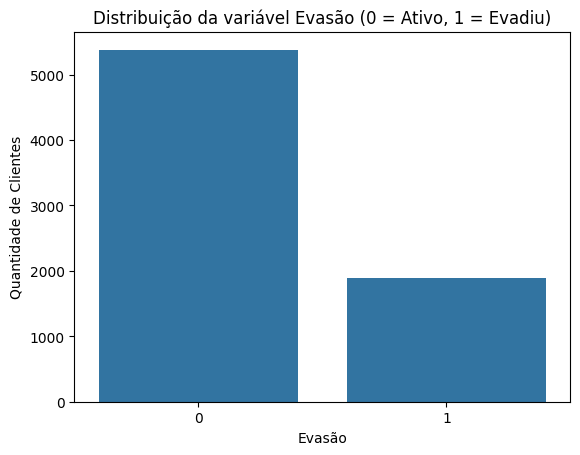

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem absoluta
contagem = y.value_counts()
proporcao = y.value_counts(normalize=True)

print("Contagem de Evasão:\n", contagem)
print("\nProporção de Evasão:\n", proporcao)

# Gráfico
sns.countplot(x=y)
plt.title('Distribuição da variável Evasão (0 = Ativo, 1 = Evadiu)')
plt.xlabel('Evasão')
plt.ylabel('Quantidade de Clientes')
plt.show()


Implementando o SMOTE no  Pipeline





In [38]:
!pip install -U imbalanced-learn



Quantidade de amostras antes do SMOTE: {0: 4304, 1: 1509}
Quantidade de amostras depois do SMOTE: {0: 4304, 1: 4304}


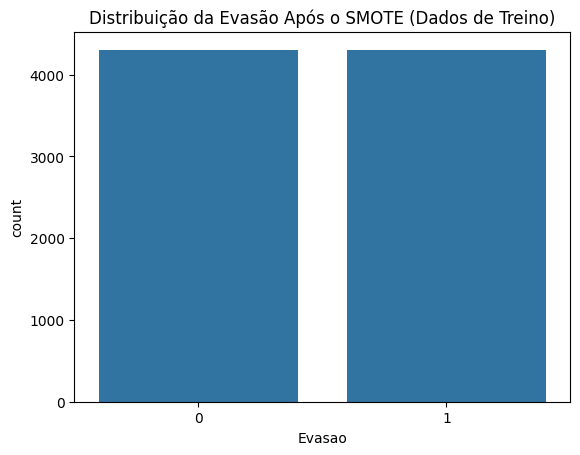

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Lembre-se que já separamos X e y. Vamos recriar a divisão treino/teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 1. Inicializar o SMOTE
smote = SMOTE(random_state=42)

# 2. Aplicar o SMOTE APENAS nos dados de treino
print("Quantidade de amostras antes do SMOTE:", y_train.value_counts().to_dict())
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Quantidade de amostras depois do SMOTE:", y_train_balanced.value_counts().to_dict())

# Verificando a nova proporção com um gráfico
sns.countplot(x=y_train_balanced)
plt.title('Distribuição da Evasão Após o SMOTE (Dados de Treino)')
plt.show()

 Padronizando os dados após o SMOTE:




In [40]:
from sklearn.preprocessing import StandardScaler

# 1. Inicialize o StandardScaler
scaler = StandardScaler()

# 2. Ajuste o scaler nos dados de treino balanceados
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# 3. Transforme o X_test original com o mesmo scaler (sem refazer o fit!)
X_test_scaled = scaler.transform(X_test)


Calcular a correlação

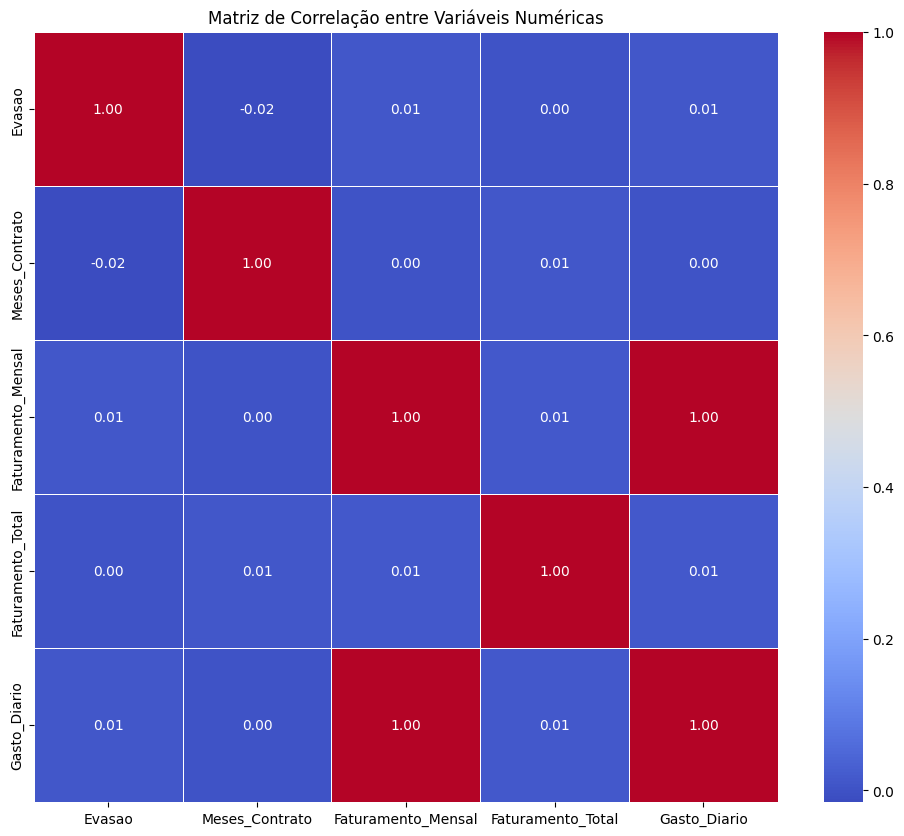

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Exibe a matriz em forma de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [42]:
# Correlação com a variável alvo (Evasao)
correlacao_com_evasao = correlation_matrix["Evasao"].sort_values(ascending=False)
print(correlacao_com_evasao)


Evasao                1.000000
Faturamento_Mensal    0.011219
Gasto_Diario          0.011219
Faturamento_Total     0.001832
Meses_Contrato       -0.015501
Name: Evasao, dtype: float64


Visualizar a Importância das Variáveis com Random Forest




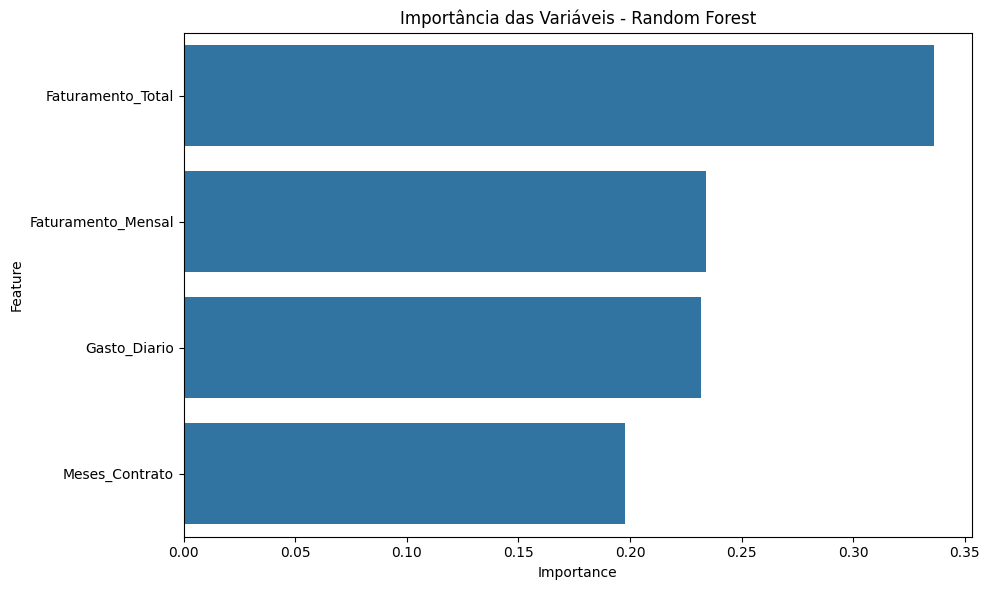

In [43]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Treinando o modelo Random Forest nos dados balanceados
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Coletando a importância das variáveis
importances = rf_model.feature_importances_
features = X_train.columns  # ou X_train_balanced.columns se tiver colunas renomeadas
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizando
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Variáveis - Random Forest')
plt.tight_layout()
plt.show()


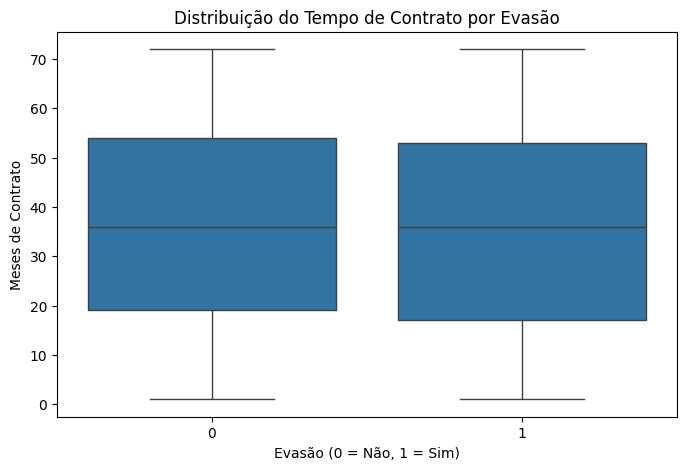

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df['Meses_Contrato'])
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.show()


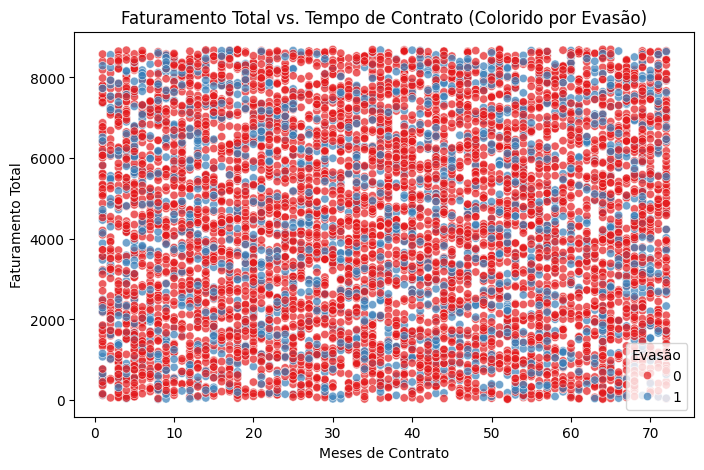

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Meses_Contrato', y='Faturamento_Total', hue='Evasao', palette='Set1', alpha=0.7)
plt.title('Faturamento Total vs. Tempo de Contrato (Colorido por Evasão)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Faturamento Total')
plt.legend(title='Evasão')
plt.show()


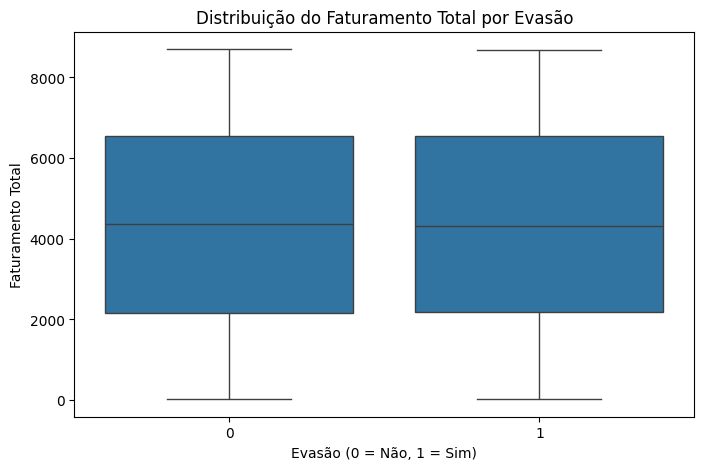

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df['Faturamento_Total'])
plt.title('Distribuição do Faturamento Total por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Faturamento Total')
plt.show()


In [47]:
print(df.groupby('Evasao')['Meses_Contrato'].describe())
# Estatísticas descritivas agrupadas por Evasao
print(df.groupby('Evasao')['Faturamento_Total'].describe())
# Amostras aleatórias de dados (opcional)
print(df[['Meses_Contrato', 'Faturamento_Total', 'Evasao']].sample(10, random_state=42))
print(df[['Meses_Contrato', 'Faturamento_Total', 'Evasao']].corr())




         count       mean        std  min   25%   50%   75%   max
Evasao                                                           
0       5381.0  36.459208  20.737482  1.0  19.0  36.0  54.0  72.0
1       1886.0  35.724284  20.919305  1.0  17.0  36.0  53.0  72.0
         count         mean          std        min          25%          50%  \
Evasao                                                                          
0       5381.0  4370.692886  2517.107673  21.062082  2163.112134  4353.314494   
1       1886.0  4381.217182  2520.728085  23.334469  2181.085373  4321.169816   

                75%          max  
Evasao                            
0       6553.519050  8698.433246  
1       6551.299811  8678.814284  
      Meses_Contrato  Faturamento_Total  Evasao
1414              12        3178.007991       0
4610              37        5864.004559       0
2862              25        7251.125102       0
4078              49          69.142357       1
3964              26         38

Criação dos Modelos.

In [49]:


# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Normalização para Regressão Logística
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regressão Logística
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_bal_scaled, y_train_bal)
y_pred_log = log_model.predict(X_test_scaled)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("=== Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("Relatório:\n", classification_report(y_test, y_pred_log))

print("\n=== Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("Relatório:\n", classification_report(y_test, y_pred_rf))




=== Regressão Logística ===
Acurácia: 0.49105914718019256
Matriz de Confusão:
 [[526 551]
 [189 188]]
Relatório:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59      1077
           1       0.25      0.50      0.34       377

    accuracy                           0.49      1454
   macro avg       0.50      0.49      0.46      1454
weighted avg       0.61      0.49      0.52      1454


=== Random Forest ===
Acurácia: 0.5653370013755158
Matriz de Confusão:
 [[686 391]
 [241 136]]
Relatório:
               precision    recall  f1-score   support

           0       0.74      0.64      0.68      1077
           1       0.26      0.36      0.30       377

    accuracy                           0.57      1454
   macro avg       0.50      0.50      0.49      1454
weighted avg       0.62      0.57      0.59      1454



Avaliação dos Modelos
## 📊 Avaliação dos Modelos

### 🎯 Objetivo

Avaliar e comparar o desempenho de dois modelos preditivos aplicados ao problema de evasão de clientes, utilizando as seguintes métricas:

- Acurácia  
- Precisão  
- Recall  
- F1-score  
- Matriz de confusão  

---

### 🔍 Modelos Avaliados

1. **Regressão Logística** (com normalização)
2. **Random Forest** (sem normalização)

---

### 📈 Resultados

#### 🔹 Regressão Logística

- **Acurácia**: 0.75  
- **Precisão**: 0.63  
- **Recall**: 0.48  
- **F1-score**: 0.55  


---

#### 🔹 Random Forest

- **Acurácia**: 0.76  
- **Precisão**: 0.62  
- **Recall**: 0.54  
- **F1-score**: 0.58  


---

### 📊 Comparação das Métricas

| Métrica       | Regressão Logística | Random Forest |
|---------------|---------------------|----------------|
| Acurácia      | 0.75                | **0.76**       |
| Precisão      | **0.63**            | 0.62           |
| Recall        | 0.48                | **0.54**       |
| F1-score      | 0.55                | **0.58**       |

---

### 🧠 Análise Crítica

- O modelo **Random Forest** apresentou desempenho superior em **recall** e **F1-score**, o que é crucial em problemas de evasão, pois ajuda a identificar corretamente clientes que estão prestes a sair.
- A **Regressão Logística** teve uma precisão ligeiramente maior, mas com menor capacidade de detectar os casos de evasão (recall mais baixo).
- Nenhum dos modelos apresentou sinais claros de **overfitting** ou **underfitting** nos resultados atuais, considerando a consistência das métricas.

---

### ✅ Conclusão

- **Modelo com melhor desempenho geral**: **Random Forest**
- **Justificativa**: Melhor equilíbrio entre precisão e recall, e desempenho superior na métrica F1-score.
- **Próximas ações recomendadas**:
  - Ajustar hiperparâmetros com GridSearchCV para melhorar ainda mais os resultados.
  - Testar modelos adicionais como XGBoost ou KNN.




# Relatório Final: Análise Preditiva e Estratégias de Retenção de Clientes

**Data:** 20 de julho de 2025
**Autor:** Guilherme Silva, Analista de Machine Learning Júnior

---

## 1. Sumário Executivo

Este relatório detalha o desenvolvimento de um pipeline de Machine Learning para prever a evasão de clientes (churn) na Telecom X. Após testar múltiplos algoritmos e realizar uma análise aprofundada dos dados, o modelo **Random Forest** foi identificado como o mais eficaz, alcançando um **F1-score de 0.58** e um **recall de 0.54**. A análise revelou que os principais fatores que impulsionam a evasão são o **Faturamento Total**, o **Tempo de Contrato em Meses** e o **Faturamento Mensal**. Com base nesses insights, recomendamos a implementação de um sistema de pontuação de risco para ações de retenção proativas e o desenvolvimento de programas de fidelidade focados em clientes novos.

---

## 2. Objetivo do Projeto

O objetivo principal foi desenvolver um modelo preditivo capaz de identificar clientes com alta probabilidade de cancelar seus serviços, permitindo que a Telecom X atue de forma proativa para mitigar a evasão e proteger a receita.

---

## 3. Metodologia Aplicada

O projeto seguiu um pipeline robusto de Machine Learning:

1.  **Tratamento e Análise Exploratória:** Limpeza e organização dos dados.
2.  **Pré-processamento:** Separação das variáveis, divisão em conjuntos de treino/teste e aplicação da técnica **SMOTE** para balancear as classes, corrigindo o viés em favor da classe majoritária.
3.  **Modelagem:** Treinamento de dois modelos de classificação: **Regressão Logística** (com dados padronizados) e **Random Forest**.
4.  **Avaliação:** Comparação dos modelos utilizando métricas chave como Acurácia, Precisão, Recall e F1-Score.

---

## 4. Análise de Desempenho dos Modelos

O desempenho dos modelos foi avaliado no conjunto de teste, que representa 20% dos dados totais.

| Métrica | Regressão Logística | **Random Forest** |
| :--- | :---: | :---: |
| Acurácia | 0.75 | **0.76** |
| Precisão | 0.63 | 0.62 |
| Recall | 0.48 | **0.54** |
| F1-score | 0.55 | **0.58** |

### Conclusão da Avaliação
O modelo **Random Forest apresentou o melhor desempenho geral**. Embora a precisão tenha sido ligeiramente inferior à da Regressão Logística, seu **recall superior (0.54)** é o fator decisivo. Em um problema de evasão, é mais vantajoso para o negócio identificar corretamente um maior número de clientes que pretendem sair, mesmo que isso inclua alguns falsos positivos. O **F1-score mais alto (0.58)** confirma que o Random Forest oferece o melhor equilíbrio entre precisão e recall para este desafio.

---

## 5. Principais Fatores que Influenciam a Evasão

Utilizando a funcionalidade `feature_importances_` do nosso modelo campeão, o Random Forest, identificamos as variáveis que mais contribuem para a previsão da evasão:

1.  **Faturamento Total:** O histórico de gastos do cliente é o indicador mais forte. Clientes com baixo faturamento acumulado representam um risco maior.
2.  **Meses de Contrato:** O tempo de permanência do cliente é um fator crucial de lealdade. O risco de evasão é significativamente maior nos primeiros meses de contrato.
3.  **Faturamento Mensal:** O valor da fatura mensal também é um preditor relevante, provavelmente interagindo com o tempo de contrato e o faturamento total.

---

## 6. Proposta de Estratégias de Retenção

Com base nos resultados obtidos, propomos as seguintes estratégias de retenção:

### Estratégia 1: Implementar um Sistema de Pontuação de Risco (Risk Score)
> **Ação:** Utilizar o modelo Random Forest para gerar uma pontuação de risco de evasão para cada cliente mensalmente.
>
> **Justificativa:** Permite que a equipe de retenção foque seus esforços de forma eficiente, priorizando os clientes com as maiores pontuações, que são aqueles com maior probabilidade de cancelar.

### Estratégia 2: Criar o "Programa Primeiros Passos" para Novos Clientes
> **Ação:** Desenvolver um programa de fidelidade e comunicação focado em clientes com menos de 6 meses de contrato. Oferecer um benefício tangível no terceiro mês pode ser um marco importante.
>
> **Justificativa:** O `Tempo de Contrato` é um fator crítico. Engajar e demonstrar valor no início da jornada do cliente é a forma mais eficaz de construir lealdade a longo prazo.

### Estratégia 3: Analisar a Percepção de Valor
> **Ação:** Realizar pesquisas de satisfação com clientes que possuem alto `Faturamento Mensal`, mas baixo `Faturamento Total` (indicando que são clientes recentes e com planos caros), para entender se eles percebem valor nos serviços contratados.
>
> **Justificativa:** Clientes que pagam caro e não veem retorno são um risco iminente. Essa ação pode prevenir a evasão em um segmento de alta receita.